In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [129]:
url = 'https://raw.githubusercontent.com/Startup-acdm/PDS4/main/Lessons/Lesson%2037/Position_Salaries.csv?token=GHSAT0AAAAAACBPO2BY4FFXJF6HCRLK3GTYZCJRYMA'
df = pd.read_csv(url)

print(df.head())

            Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [130]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values
X, y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

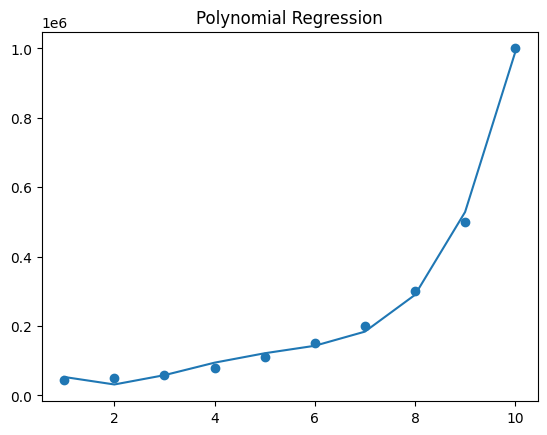

In [131]:
#polynomial fit with degree = 4
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)


plt.scatter(X, y)
plt.plot(X, lin_reg.predict(poly_reg.fit_transform(X)))
plt.title('Polynomial Regression')
plt.show()

task 2

In [132]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [133]:
from numpy import genfromtxt
dataset = genfromtxt('https://raw.githubusercontent.com/Startup-acdm/PDS4/main/Lessons/Lesson%2037/communities.csv?token=GHSAT0AAAAAACBPO2BZHQM6ZCULHJYVVLQAZCJQQYA', delimiter=',')
dataset 

array([[8.000e+00,       nan,       nan, ..., 3.200e-01, 1.400e-01,
        2.000e-01],
       [5.300e+01,       nan,       nan, ..., 0.000e+00,       nan,
        6.700e-01],
       [2.400e+01,       nan,       nan, ..., 0.000e+00,       nan,
        4.300e-01],
       ...,
       [9.000e+00, 9.000e+00, 8.007e+04, ..., 9.100e-01, 2.800e-01,
        2.300e-01],
       [2.500e+01, 1.700e+01, 7.260e+04, ..., 2.200e-01, 1.800e-01,
        1.900e-01],
       [6.000e+00,       nan,       nan, ..., 1.000e+00, 1.300e-01,
        4.800e-01]])

In [137]:
# inplace NaN values
df = pd.DataFrame(dataset)
df.fillna(0, inplace=True)
dataset = np.array(df)

In [138]:
X = dataset[:, :-1]
y = dataset[:,-1]
# X,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [140]:
lr = LinearRegression().fit(X_train, y_train)
print("LinRegr with train data:", lr.score(X_train, y_train))
print("LinRegr with test data:", lr.score(X_test, y_test))

LinRegr with train data 0.7097676771879318
LinRegr with test data 0.6575035475519477


In [157]:
alphas = [0.01, 0.1, 0.7, 1]

# Ridge regularization
ridge_scores_train = []
ridge_scores_test = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    ridge_scores_train.append(ridge.score(X_train, y_train))
    ridge_scores_test.append(ridge.score(X_test, y_test))

# Lasso regularization
lasso_scores_train = []
lasso_scores_test = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    lasso_scores_train.append(lasso.score(X_train, y_train))
    lasso_scores_test.append(lasso.score(X_test, y_test))


# Elastic Net regularization
elastic_scores_train = []
elastic_scores_test = []
for alpha in alphas:
    elastic = ElasticNet(alpha=alpha, l1_ratio=0.5).fit(X_train, y_train)
    elastic_scores_train.append(elastic.score(X_train, y_train))
    elastic_scores_test.append(elastic.score(X_test, y_test))

# print('Ridge scores train:', ridge_scores_train)
# print('Lasso scores train:', lasso_scores_train)
# print('Elastic Net scores train:', elastic_scores_train)
# print()

# print('Ridge scores test:', ridge_scores_test)
# print('Lasso scores test:', lasso_scores_test)
# print('Elastic Net scores test:', elastic_scores_test)
# print()

# print('Max Ridge scores test:', max(ridge_scores_test))
# print('Max Lasso scores test:', max(lasso_scores_test))
# print('Max Elastic Net scores test:', max(elastic_scores_test))

Max_Ridge_scores_test = max(ridge_scores_test)
Max_Lasso_scores_test = max(lasso_scores_test)
Max_Elastic_Net_scores_test = max(elastic_scores_test)

max_value = max(Max_Ridge_scores_test, Max_Lasso_scores_test, Max_Elastic_Net_scores_test)
if max_value == Max_Ridge_scores_test:
    print('The best option is Ridge, score =',  Max_Ridge_scores_test)
elif max_value == Max_Lasso_scores_test:
        print('The best option is Lasso, score =',  Max_Lasso_scores_test)
elif max_value == Max_Elastic_Net_scores_test:
        print('The best option is ElasticNet, score =',  Max_Elastic_Net_scores_test)







The best option is Ridge, score = 0.6601116848463167
